In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import mglearn 

# we don't need plt.show()
%matplotlib inline

# 1. Linear Models for Regression

w[0]: 0.393906  b: -0.031804


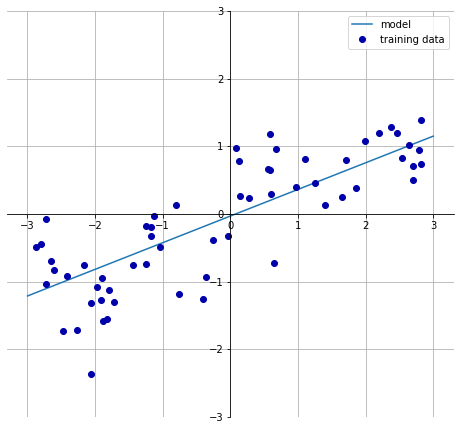

In [22]:
# Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
mglearn.plots.plot_linear_regression_wave()

* Linear models for regression can be characterized as regression models for which the prediction is a **line** for a single feature, a **plane** when using two features, or a **hyper‐ plane** in higher dimensions when using more features.
* There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled.

# 2. Linear regression (aka ordinary least squares)

* Linear regression finds the parameters **w** and **b** that **minimize MSE** on the training set. 
* Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

In [40]:
# ex1
# import and fit data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

* The “slope” parameters (**w**), also called weights or coefficients, are stored in the **coef_**
attribute, while the offset or intercept (**b**) is stored in the **intercept_** attribute:


* `scikit-learn` stores anything derived from the training data in attributr end w underscore - to separate them from parameter that are set by the user

In [31]:
print(lr.coef_, lr.intercept_)

[0.39390555] -0.03180434302675976


In [33]:
# Training ser and test set performance
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


* 0.66 is not very good, but the scores on the training and test sets are very close together. This means we are likely underfitting, not over‐ fitting. 

* For this **one-dimensional dataset**, there is little danger of overfitting, as the model is very simple (or restricted). However, with **higher-dimensional datasets** (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

In [41]:
# ex2 
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train,y_train)

In [38]:
print(lr.coef_, lr.intercept_)

[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01 -1.76611

In [39]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9520519609032729
0.6074721959665736


* This discrepancy between performance on the training set and the test set is a clear sign of **overfitting**

# 3. Ridge regression

* In **Ridge regression**, the coefficients (**w**) are chosen not only so that they **predict well on the training data**, but also to **fit an additional constraint**. We also want the **magnitude of coefficients to be as small as possible** - all entries of w should be close to zero. 

* Intuitively, this means each **feature** should have as **little effect on the outcome** as possible (which translates to having a small slope), while still predicting well. 

* This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print(ridge.score(X_train,y_train))
print(ridge.score(X_test, y_test))

0.8857966585170938
0.7527683481744756


* As you can see, the training set score of **Ridge** is lower than for **LinearRegression**, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit.

* As we are only interested in generalization perfor‐ mance, we should choose the Ridge model over the LinearRegression model.


* The **Ridge** model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the **alpha** parameter. 

* The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

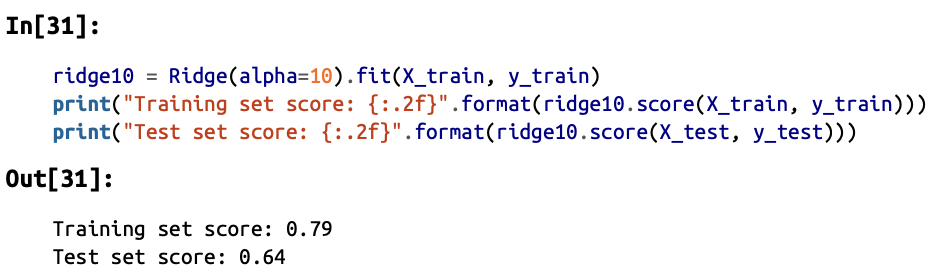
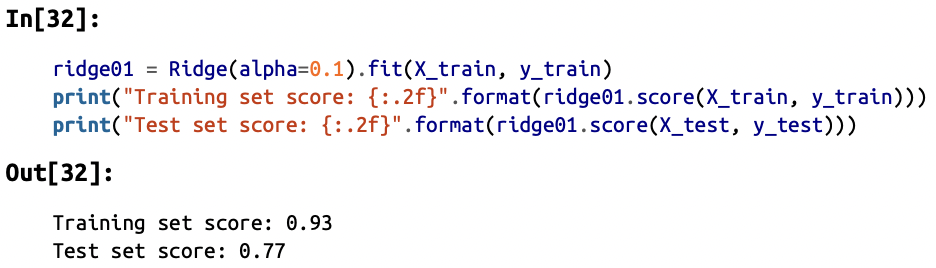

# 4. Lasso Regression
* As with **Ridge regression**, using the **Lasso** also restricts coefficients to be close to zero, but in a slightly different way, called **L1 regularization**. 


* The consequence of **L1 regularization** is that when using the lasso, **some coefficients are exactly zero**. This means some features are entirely **ignored** by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

# underfitting 
print(lasso.score(X_train, y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114596
0.20937503255272272
4


* As you can see, **Lasso** does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features.


* Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of `max_iter` (the maximum num‐ ber of iterations to run):

In [45]:
# fit 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


* If we set alpha too low, however, we again remove the effect of regularization and end up **overfitting**

In [46]:
# overfitting
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


* In practice, **ridge regression** is usually the first choice between these **two models**. 
* However, if you have a large amount of features and expect only a few of them to be important, **Lasso** might be a better choice. 
